In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#vacuum permitivity
eps_not = 8.854e-12 #A^2s^4/kgm^3
#vacuum permeability
mu_not = 4*np.pi*(10**(-7)) #N/A^2
#charge of an electron
e = -1.602e-19 #C
#Planck's constant
h = 6.626e-34 #kgm^2/s
#reduced Planck's constant
hbar = h/(2*np.pi) #kgm^2/s
#speed of light
c = 2.998e8 #m/s
#mass of an electron
m_e = 9.109e-31 #kg

#Compton wavelength of an electron
eps = h/(m_e*c)

# Energy eigenvalues in a 3D infinite square well
$$
E_n=\left(n_x^2+n_y^2+n_z^2\right)\frac{\pi^2\hbar^2}{2ma^2}
$$
# Energy eigenstates in a 3D inifinite square well
$$
\psi_n(\mathbf{x})=\left(\frac{2}{a}\right)^{3/2}\sin\left(\frac{n_x\pi}{a}x\right)\sin\left(\frac{n_y\pi}{a}y\right)\sin\left(\frac{n_z\pi}{a}z\right)
$$
# Gradient of the energy eigenstates of a 3D infinite square well
$$
\nabla\psi_n(\mathbf{x})=\left(\frac{2}{a}\right)^{3/2}\frac{\pi}{a}\Big[n_x\cos\left(\frac{n_x\pi}{a}x\right)\sin\left(\frac{n_y\pi}{a}y\right)\sin\left(\frac{n_z\pi}{a}z\right)\hat{x}+n_y\sin\left(\frac{n_x\pi}{a}x\right)\cos\left(\frac{n_y\pi}{a}y\right)\sin\left(\frac{n_z\pi}{a}z\right)\hat{y}+n_z\sin\left(\frac{n_x\pi}{a}x\right)\sin\left(\frac{n_y\pi}{a}y\right)\cos\left(\frac{n_z\pi}{a}z\right)\hat{z}\Big]
$$

In [69]:
#energy eigenvalues for a 3D infinite square well
def E_n(a, nx, ny, nz):
    E = ((nx**2)+(ny**2)+(nz**2)) * ((np.pi**2)*(hbar**2))/(2*m_e*(a**2))
    return E

#energy eigenstates for the 3D infinite square well
def psi_n(x, y, z, a, nx, ny, nz):
    #normalization factor
    prefac = (2/a)**(3/2)
    #x component of the wavefunction
    x_part = np.sin(((nx*np.pi)/a)*x)
    #y component of the wavefunction
    y_part = np.sin(((ny*np.pi)/a)*y)
    #z component of the wavefunction
    z_part = np.sin(((nz*np.pi)/a)*z)
    #full wavefunction
    psi = prefac * x_part * y_part * z_part
    return psi

#gradient of the energy eigenstates for the 3D inifinite square well
def grad_psi_n(x, y, z, a, nx, ny, nz):
    #normalization factor
    prefac = ((2/a)**(3/2)) * (np.pi/a)
    #x component of the wavefunction
    x_term = prefac * nx * np.cos(((nx*np.pi)/a)*x) * np.sin(((ny*np.pi)/a)*y) * np.sin(((nz*np.pi)/a)*z)
    #y component of the wavefunction
    y_term = prefac * ny * np.sin(((nx*np.pi)/a)*x) * np.cos(((ny*np.pi)/a)*y) * np.sin(((nz*np.pi)/a)*z)
    #z component of the wavefunction
    z_term = prefac * nz * np.sin(((nx*np.pi)/a)*x) * np.sin(((ny*np.pi)/a)*y) * np.cos(((nz*np.pi)/a)*z)
    return [x_term, y_term, z_term]

#get unique triplets of x, y, and z energy levels
def get_n_list(n_max):
    n_list=[]
    for i in range(1,n_max+1):
        for j in range(1,n_max+1):
            for k in range(1,n_max+1):
                if [i,j,k] not in n_list and [i,k,j] not in n_list and [j,i,k] not in n_list and [j,k,i] not in n_list and [k,i,j] not in n_list and [k,j,i] not in n_list:
                    n_list.append([i,j,k])
    return n_list

# Classical electric energy
$$
W_E=\frac{1}{8\pi\epsilon_0}\iint d\mathbf{x}d\mathbf{x}'\frac{\rho(\mathbf{x})\rho(\mathbf{x}')}{|\mathbf{x}-\mathbf{x}'|}
$$
# Quantum electric energy
$$
E_E=\frac{e^2}{8\pi\epsilon_0}\sum\limits_n\iint d\mathbf{x}d\mathbf{x}'\frac{\psi_1^*(\mathbf{x})\psi_n(\mathbf{x})\psi_n^*(\mathbf{x}')\psi_1(\mathbf{x}')}{|\mathbf{x}-\mathbf{x}'|}
$$
# Classical magnetic energy
$$
W_M=\frac{\mu_0}{8\pi}\iint d\mathbf{x}d\mathbf{x}'\frac{\vec{J}(\mathbf{x})\cdot\vec{J}(\mathbf{x}')}{|\mathbf{x}-\mathbf{x}'|}
$$
# Exact quantum magnetic energy
$$
E_M=\frac{-\hbar^2e^2\mu_0}{8\pi m^2}\sum\limits_n\iint d\mathbf{x}d\mathbf{x}'\frac{\langle\psi_0|\nabla(\mathbf{x})|\psi_n\rangle\cdot\langle\psi_n|\nabla(\mathbf{x}')|\psi_0\rangle}{|\mathbf{x}-\mathbf{x}'|}
$$
# Approximate quantum magnetic energy
$$
E_M=\frac{e^2\mu_0}{8\pi\hbar^2}\sum\limits_{n}(E_0-E_n)^2\iint d\mathbf{x}d\mathbf{x}'\frac{\psi_0^*(\mathbf{x})\psi_n(\mathbf{x})\psi^*_n(\mathbf{x}')\psi_0(\mathbf{x}')\left(\mathbf{x}\cdot\mathbf{x}'\right)}{|\mathbf{x}-\mathbf{x}'|}
$$
# Monte Carlo integration
$$
\int_V f(\mathbf{x})d\mathbf{x}\approx \frac{V}{N}\sum\limits_{i=1}^Nf(\mathbf{x}_i)
$$

In [21]:
#integrand for electric energy
def EE_integrand(x, y, z, xp, yp, zp, a, nx, ny, nz):
    coefficient = (e**2)/(8*np.pi*eps_not)
    #ground state wavefunction at (x,y,z)
    psi0 = psi_n(x, y, z, a, 1, 1, 1)
    #nth level wavefunction at (z,y,z)
    psin = psi_n(x, y, z, a, nx, ny, nz)
    #ground state wavefunction at (x',y',z')
    psi0prime = psi_n(xp, yp, zp, a, 1, 1, 1)
    #nth level wavefunction at (x',y',z')
    psinprime = psi_n(xp, yp, zp, a, nx, ny, nz)
    #distance between (x,y,z) and (x',y',z')
    distance = np.sqrt((x-xp)**2 + (y-yp)**2 + (z-zp)**2)
    #value of the integrand
    integrand_val = (psi0*psin*psi0prime*psinprime)/distance
    return coefficient*integrand_val

#integrand for exact magnetic energy
def EM_exact_integrand(x, y, z, xp, yp, zp, a, nx, ny, nz):
    coefficient = -((hbar**2)*(e**2)*mu_not)/(8*np.pi*(m_e**2))
    #value of the gradient of the nth level state at (x,y,z)
    dpsin = grad_psi_n(x, y, z, a, nx, ny, nz)
    #value of the gradient of the ground state wavefunction at (x',y',z')
    dpsi0 = grad_psi_n(xp, yp, zp, a, 1, 1, 1)
    #value of the ground state at (x,y,z)
    psi0 = psi_n(x, y, z, a, 1, 1, 1)
    #value of the nth level wavefunction at (x',y',z')
    psin = psi_n(xp, yp, zp, a, nx, ny, nz)
    #distance between (x,y,z) and (x',y',z')
    distance = np.sqrt((x-xp)**2 + (y-yp)**2 + (z-zp)**2)
    #value of the integrand
    integrand_val = ((dpsin[0]*dpsi0[0] + dpsin[1]*dpsi0[1] + dpsin[2]*dpsi0[2])*psi0*psin)/distance
    return coefficient*integrand_val

#integrand for approximate magnetic energy
def EM_approx_integrand(x, y, z, xp, yp, zp, a, nx, ny, nz):
    coefficient = ((e**2)*mu_not)/(8*np.pi*(hbar**2))
    #ground state energy
    E0 = E_n(a, 1, 1, 1)
    #nth level energy
    En = E_n(a, nx, ny, nz)
    #value of the ground state at (x,y,z)
    psi0 = psi_n(x, y, z, a, 1, 1, 1)
    #value of the nth level wavefunction at (x,y,z)
    psin = psi_n(x, y, z, a, nx, ny, nz)
    #value of the ground state at (x',y',z')
    psi0prime = psi_n(xp, yp, zp, a, 1, 1, 1)
    #value of the nth level wavefunction at (x',y',z')
    psinprime = psi_n(xp, yp, zp, a, nx, ny, nz)
    #distance between (x,y,z) and (x',y',z')
    distance = np.sqrt((x-xp)**2 + (y-yp)**2 + (z-zp)**2)
    #value of the integrand
    integrand_val = ((x*xp+y*yp+z*zp)*psi0*psin*psi0prime*psinprime)/distance
    return coefficient*((E0-En)**2)*integrand_val

#Monte Carlo integration method
def MC(func, N, a, n_max):
    #volume of the integrand
    V=a**6
    #initial value for the energy
    energy = 0
    #get all of the unique energy levels to sum over
    n_list = get_n_list(n_max)
    for n in n_list:
        nx, ny, nz = n
        #initial value of the integral
        integral = 0
        #use the Monte Carlo method to integrate
        for i in range(int(N)):
            #get a random location in the integrand
            x, y, z, xp, yp, zp = np.random.uniform(0,a,6)
            #evalueate the integrand there
            integrand = func(x, y, z, xp, yp, zp, a, nx, ny, nz)
            #add to the total
            integral += integrand
        
        #scale by V/N
        integral *= V/N
        #when all energy levels are unique the multiplicity is 6
        if nx != ny and nx != nz and ny != nz:
            integral *= 6
        #when all energy levels are equal the multiplicity is 1
        elif nx==ny==nz:
            integral *= 1
        #when two of the energy levels are equal the multiplicity is 3
        else:
            integral *= 3
        #add to the energy
        energy += integral
    return energy

In [58]:
#Test for the number of integration points needed for convergence

#choose a range of points
N_list = np.logspace(1,6,21)
#box size
a=10*eps
#maximum term in the sum to go to
n_max=2

#start energy lists
EE_list_N = []
EM_exact_list_N = []
EM_approx_list_N =[]

#evaluate energies for different numbers of integration points
for N in N_list:
    EE = MC(EE_integrand, N, a, n_max)
    EM_exact = MC(EM_exact_integrand, N, a, n_max)
    EM_approx = MC(EM_approx_integrand, N, a, n_max)
    EE_list_N.append(EE)
    EM_exact_list_N.append(EM_exact)
    EM_approx_list_N.append(EM_approx)

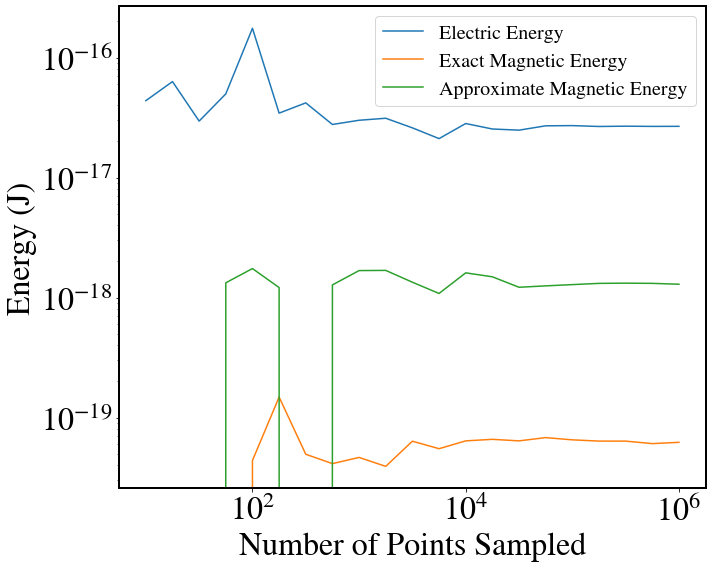

In [61]:
#plot each energy vs number of integration points
plt.plot(N_list,EE_list_N, label="Electric Energy")
plt.plot(N_list,EM_exact_list_N, label="Exact Magnetic Energy")
plt.plot(N_list,EM_approx_list_N, label="Approximate Magnetic Energy")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Points Sampled")
plt.ylabel("Energy (J)")
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
#test for convergence of the infinite series

#number of integration points to use
N=1e6
#size of the box
a=10*eps
#list of maximum terms in the sum to test
n_max_list=range(2,6)

#start energy lists
EE_list_n = []
EM_exact_list_n = []
EM_approx_list_n =[]

#find the energies for different partial sums
for n_max in n_max_list:
    EE = MC(EE_integrand, N, a, n_max)
    EM_exact = MC(EM_exact_integrand, N, a, n_max)
    EM_approx = MC(EM_approx_integrand, N, a, n_max)
    EE_list_n.append(EE)
    EM_exact_list_n.append(EM_exact)
    EM_approx_list_n.append(EM_approx)

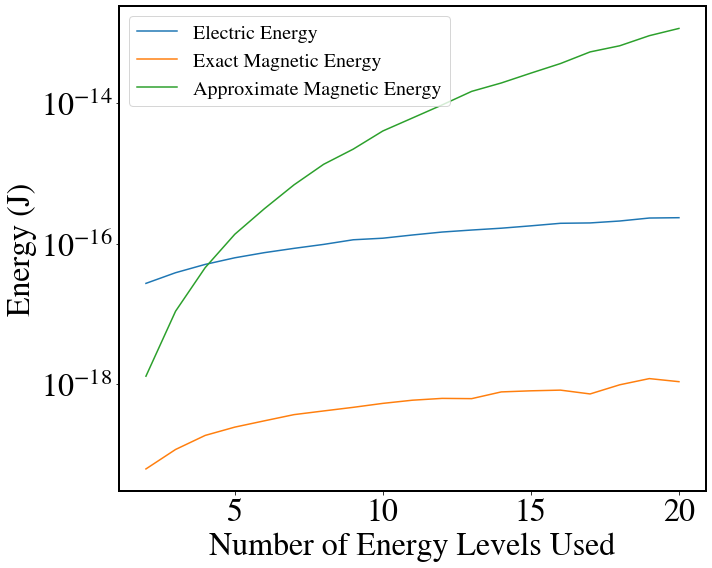

In [64]:
# plot the energies vs maximum term in the sum calculated
plt.plot(range(2,len(EE_list_n)+2),EE_list_n, label="Electric Energy")
plt.plot(range(2,len(EM_exact_list_n)+2),EM_exact_list_n, label="Exact Magnetic Energy")
plt.plot(range(2,len(EM_approx_list_n)+2),EM_approx_list_n, label="Approximate Magnetic Energy")
plt.yscale("log")
plt.xlabel("Number of Energy Levels Used")
plt.ylabel("Energy (J)")
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
#print the energy of the largest partial sum
print("The Electric Energy is", EE_list_n[-1])
print("The Exact Magnetic Energy is", EM_exact_list_n[-1])
print("The Approximate Magnetic Energy is", EM_approx_list_n[-1])

The Electric Energy is 2.332035196320938e-16
The Exact Magnetic Energy is 1.0808436412777278e-18
The Approximate Magnetic Energy is 1.1528203823156171e-13
